# Load IMAGE

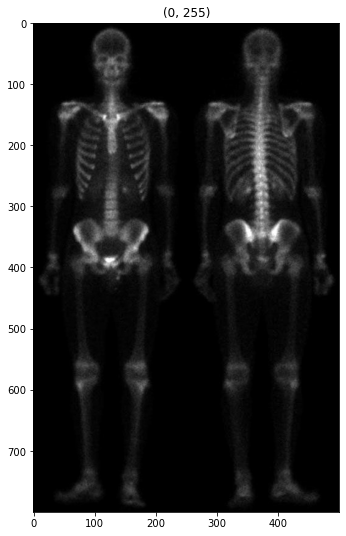

In [50]:
import cv2
import matplotlib.pyplot as plt

def pyplot_image_show(image,cmap = 'gray',figsize = (18,9)):
    plt.figure(figsize = figsize)
    plt.imshow(image,cmap='gray')
    plt.title(str((image.min(),image.max())))
    
def pyplot_comparative_show(image_1,image_2,cmap = 'gray',figsize = (18,9)):
    _,(ax1,ax2) = plt.subplots(1,2,figsize=figsize)
    ax1.imshow(image_1,cmap='gray')
    ax2.imshow(image_2,cmap='gray')
    ax1.set_title(str((image_1.min(),image_1.max())))
    ax2.set_title(str((image_2.min(),image_2.max())))
    
    

image_stock = cv2.imread("skelet.jpg", cv2.IMREAD_GRAYSCALE)
pyplot_image_show(image_stock)

# Normalize image 

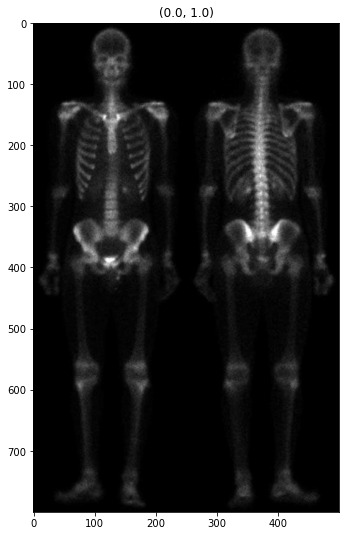

In [25]:
image_normalized = cv2.normalize(image_stock, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype= cv2.CV_64F)
pyplot_image_show(image_normalized)

# Calculate Laplacian

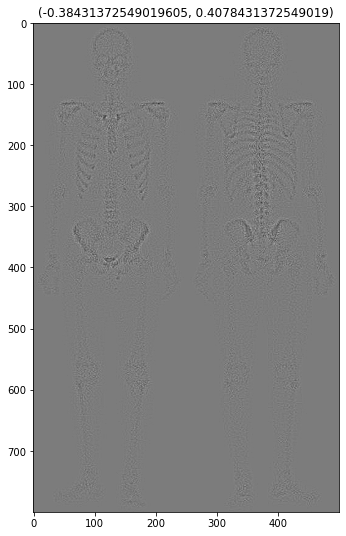

In [26]:
laplacian = cv2.Laplacian(image_normalized,cv2.CV_64F)
pyplot_image_show(laplacian)

# Add laplasian to our normalized img

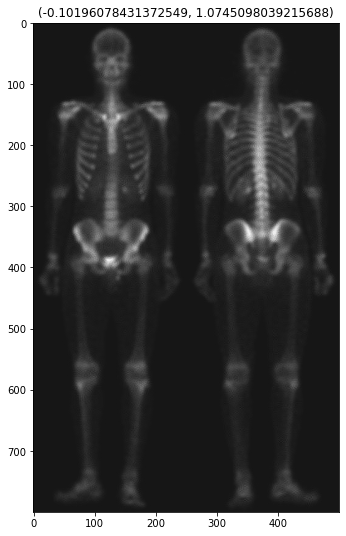

In [27]:
im_pl_lap = image_normalized + laplacian
pyplot_image_show(im_pl_lap)

# Applying Sobel filter

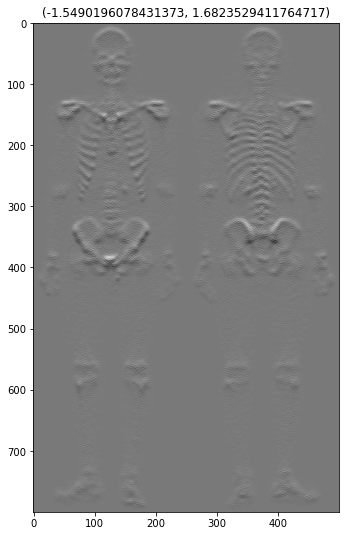

In [39]:
sobeled_image = cv2.Sobel(im_pl_lap,cv2.CV_64F,0,1)
pyplot_image_show(sobeled_image)

# Blurring Sobeled Image

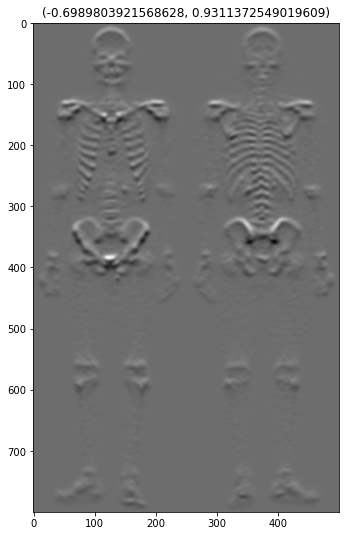

In [41]:
blurred_sobelled_image = cv2.blur(sobeled_image,(5,5))
pyplot_image_show(blurred_sobelled_image)

# Multiplication of Im_pl_lap and blurred_sobel

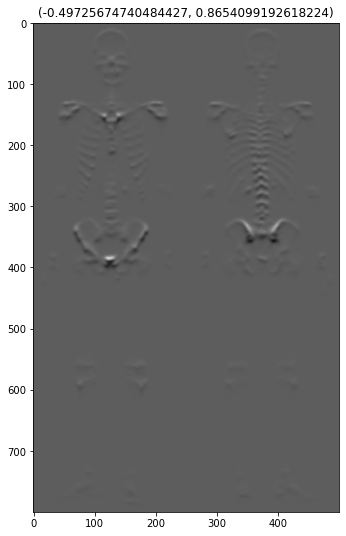

In [42]:
image_checkpoint_1 = im_pl_lap * blurred_sobelled_image
pyplot_image_show(image_checkpoint_1)

# Add checkpoint_1 to normalized_image

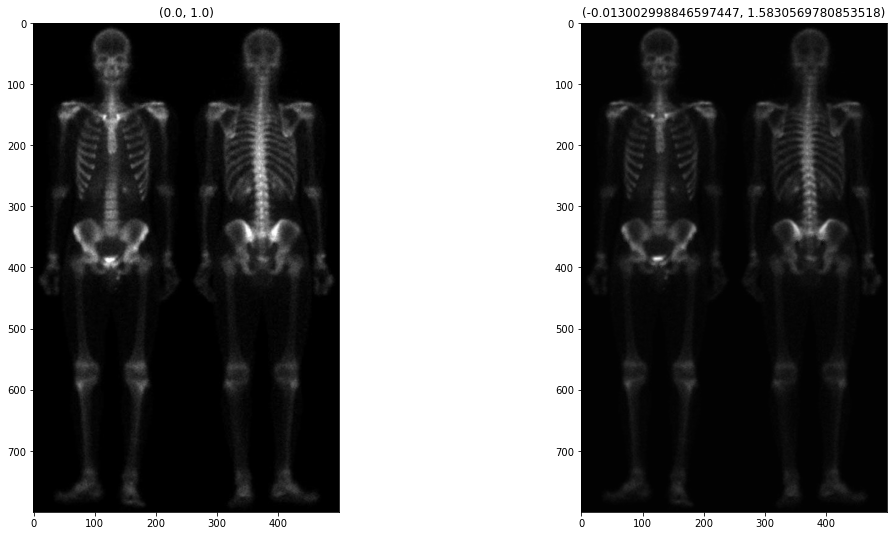

In [51]:
normalized_plus_checkp1_image = image_normalized + image_checkpoint_1
pyplot_comparative_show(image_normalized,normalized_plus_checkp1_image)

# Applying gamma correction

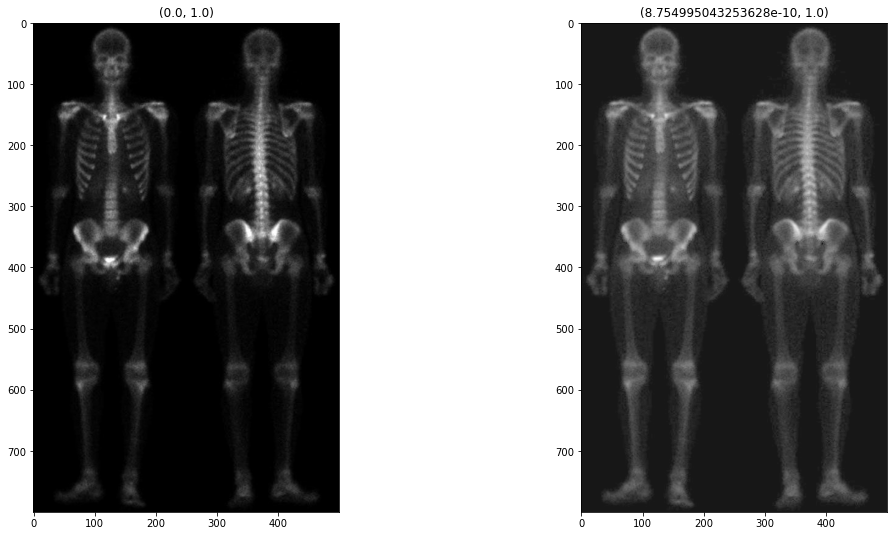

In [54]:
gamma = 0.5
c=1
normalized_plus_checkp1_image_renormalized = cv2.normalize(normalized_plus_checkp1_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype= cv2.CV_64F)
image_gamma_corrected = (normalized_plus_checkp1_image_renormalized  ** gamma) * c
pyplot_comparative_show(image_normalized,image_gamma_corrected)

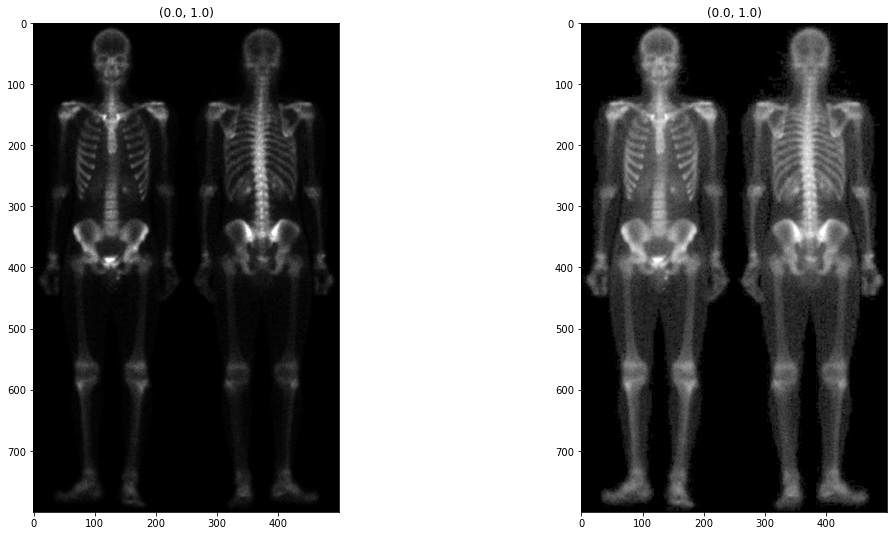

In [55]:
default_gamma_corrected = (image_normalized  ** gamma) * c
pyplot_comparative_show(image_normalized,default_gamma_corrected)

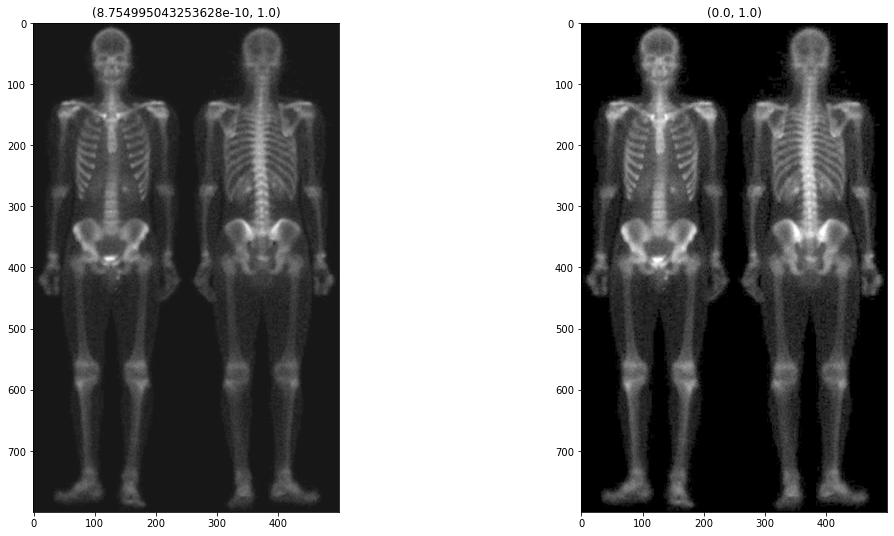

In [56]:
pyplot_comparative_show(image_gamma_corrected,default_gamma_corrected)